In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from IPython.display import clear_output

## 2D court points

### corner points:
- bottom left, top left, bottom right, top right
- (0, 400), (0, 0), (600, 400), (600, 0)

### free throw points
- bottom left, top left, bottom right, top right
- (226, 400), (226, 240), (394, 400), (394, 240)

### three point arc
- bottom left, center, bottom right
- (63, 400), (300, 185), (535, 400)

court = corner + freeThrow + threeArc

In [287]:
# Inverted court

# bottom left, top left, bottom right
invert_corner = [(0, 400), (0, 0), (600, 400), (600, 0)]

# top left, bottom left, top right, bottom right
invert_freeThrow = [(226, 0), (226, 160), (370, 0), (370, 160)]

# left, center, right
invert_threeArc = [(63, 0), (300, 216), (535, 0)]

invert_court = invert_corner + invert_freeThrow + invert_threeArc

In [180]:
# vs = cv2.VideoCapture('VIDEOS/PLAYER_EXTRACTION_TEST.mov') 

# while True:
#     # grab the current frame
#     _, img = vs.read()
#     img = cv2.resize(img,(600, 400))
#     roi = img[150:400, 0: 600]

#     r_h, r_w, r_c = roi.shape
#     i_h, i_w, i_c = img.shape

#     # line detection works better with grayscale images (less pixel range to process)
#     gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

#     # Canny edge detection to detect line edges
#     edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

#     for line in lines:
#         rho, theta = line[0]
#         a = np.cos(theta)
#         b = np.sin(theta)

#         x0 = a * rho
#         y0 = b * rho

#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))

#         x = cv2.line(img, (x1, y1 + (i_h - r_h)), (x2, y2 + (i_h - r_h)), (0, 0 ,255), 1)

#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()
#     clear_output(wait=True)

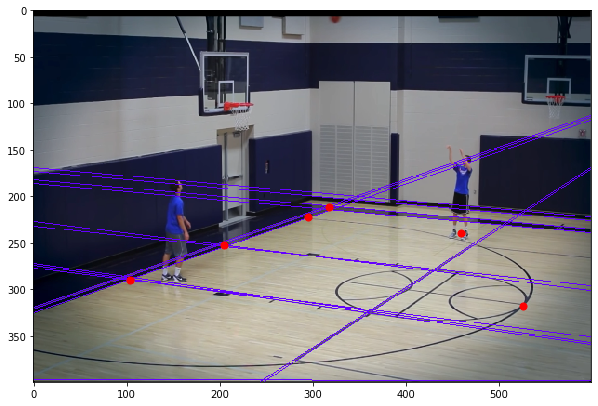

In [302]:
plt.figure(figsize=(10,8))

img = cv2.imread('/Users/esedicol/Desktop/Basketball-Shot-Detectection/images/court_extraction.png')
img  = cv2.resize(img, (600,400))

roi = img[150:400, 0: 600]

r_h, r_w, r_c = roi.shape
i_h, i_w, i_c = img.shape

# line detection works better with grayscale images (less pixel range to process)
gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

# Canny edge detection to detect line edges
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(img, (x1, y1 + (i_h - r_h)), (x2, y2 + (i_h - r_h)), (255, 0 ,100), 1)
    
xy_points = [(104, 290),(205, 252),(526, 318),(295, 222),(318, 212), (460, 240)]

for t in range(0, len(xy_points)):
    plt.scatter(xy_points[t][0], xy_points[t][1], s=50, c='r', marker='o')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

points_3D = np.float32([(104, 290), (205, 252), (526, 318), (295, 222), (318, 212)])
points_2D = np.float32([(300, 400), (200, 400), (300, 185), (60, 400), (0, 400)])

matrix, status = cv2.findHomography(points_3D, points_2D)
out = cv2.warpPerspective(img, matrix, (court.shape[1], court.shape[0]))

# Player Position Extraction using Using Hough Transform Algorithm 

<Figure size 720x576 with 0 Axes>

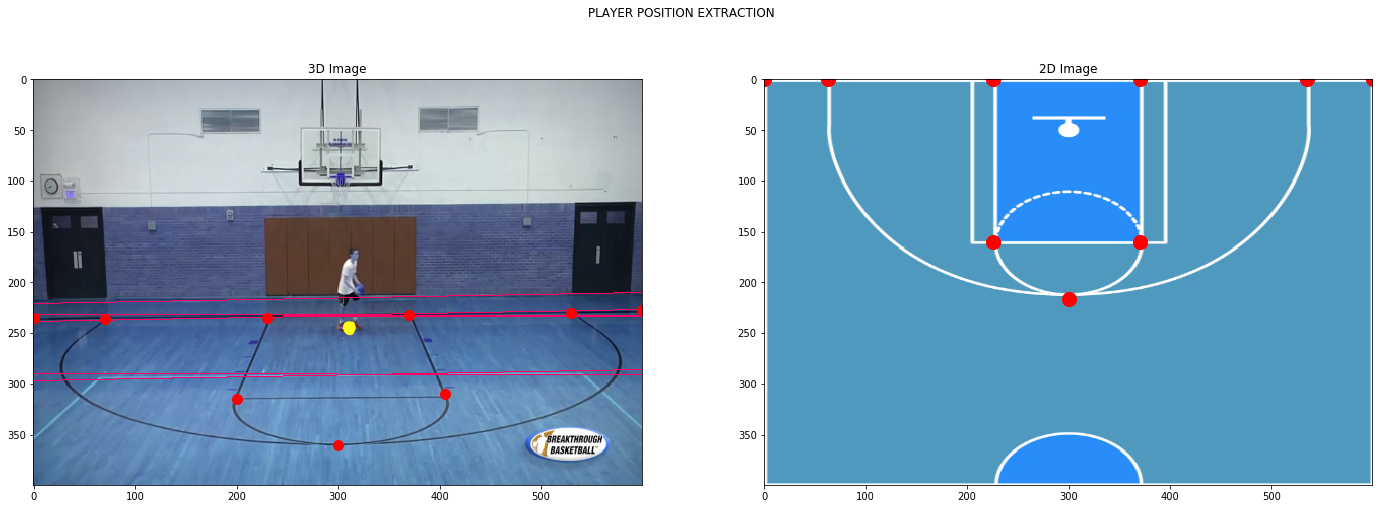

In [304]:
plt.figure(figsize=(10,8))

img2 = cv2.imread('/Users/esedicol/Desktop/Basketball-Shot-Detectection/images/court_extraction2.png')
img2  = cv2.resize(img2, (600,400))

inverted_court = cv2.imread('/Users/esedicol/Desktop/Basketball-Shot-Detectection/images/court_invert.png')
inverted_court  = cv2.resize(inverted_court, (600,400))

roi = img2[150:400, 0: 600]

r_h, r_w, r_c = roi.shape
i_h, i_w, i_c = img2.shape

# line detection works better with grayscale images (less pixel range to process)
gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)

# Canny edge detection to detect line edges
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(img2, (x1, y1 + (i_h - r_h)), (x2, y2 + (i_h - r_h)), (255, 0 ,100), 1)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle("PLAYER POSITION EXTRACTION")

ax1.set_title("3D Image")
for p in range(0, len(pts_3D)):
    ax1.scatter(pts_3D[p][0], pts_3D[p][1], s=100, c='r', marker='o')

ax2.set_title("2D Image")
for p in range(0, len(pts_2D)):
    ax2.scatter(pts_2D[p][0], pts_2D[p][1], s=200, c='r')
    
ax1.imshow(img2)
ax2.imshow(inverted_court)
plt.show()

In [292]:
pts_3D = np.array([(0,235), (70, 236), (230, 235), (370, 232), (530, 230), (600, 227), (300, 360), (200, 315), (405, 310)])
pts_2D = np.array([(0, 0), (63, 0),(226, 0), (370, 0), (535, 0), (600, 0), (300, 216), (226, 160), (370, 160) ])

m, status = cv2.findHomography(pts_3D, pts_2D)
out_2 = cv2.warpPerspective(img2, m, (inverted_court.shape[1], inverted_court.shape[0]))